In [24]:
%matplotlib inline
import tricorder
import numpy as np

In [25]:
tricorder.write_default_config('dummy_test')

In [26]:
!ls $DES_SIMS/new/results

dummy_test.config


In [27]:
dset_fname = '/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/redmagicHD/ZSPEC0.2_0.3nside1024nJack30'
config_fname = '/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/results/dummy_test.config'

In [28]:
corr = tricorder.PixelCorrelation(dset_fname,config_fname)

In [29]:
corr.make_treecorr_cat()

In [31]:
corr.compute_2pt_pix()

2PCF took 0.567343950272


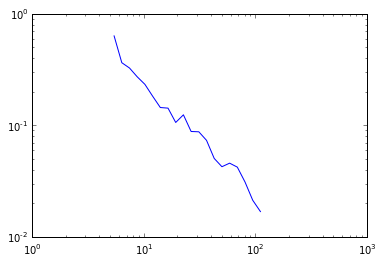

In [32]:
import matplotlib.pyplot as plt
plt.loglog(np.exp(corr.kk.logr),corr.kk.xi)

In [33]:
corr.compute_3pt_pix()

3PCF took 314.111320972


In [34]:
corr.kkk.zeta

array([[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  2.27598149e+00,   3.36797547e+00,  -2.05822641e-01, ...,
          -5.03708806e+00,   4.55991824e-01,   2.27598161e+00],
        [ -1.00000000e+00,   3.36797547e+00,  -5.91012203e-01, ...,
           1.22834767e+00,  -1.00000000e+00,   1.91198365e+00],
        [  8.18475191e-01,   2.49438038e+00,   0.00000000e+00, ...,
           0.00000000e+00,   7.47190189e-01,  -2.48753669e-01]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+0

In [35]:
corr.write()

In [36]:
!ls $DES_SIMS/new/results

dummy_test.config      dummy_test.xi.npy
dummy_test.weight.npy  dummy_test.zeta.npy


In [37]:
corr.submit()

['bsub', '-W', '47:00', '-R', 'rusage[mem=8000]', 'python', '-c', "import tricorder; corr = tricorder.PixelCorrelation('/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/redmagicHD/ZSPEC0.2_0.3nside1024nJack30', '/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/results/dummy_test.config'); corr.run()"]


In [39]:
corr2 = tricorder.PixelCorrelation(dset_fname,config_fname)

In [40]:
corr2.run()

2PCF took 0.474263906479
3PCF took 269.794221163
